Name: 
Type: Graph
Number of nodes: 88
Number of edges: 91
Average degree:   2.0682
Maximum degree= 5
Minimum degree= 1
Average path length= 2.422222222222222
Average Clustering= 0.2166666666666667
Degree sequence [5, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1]


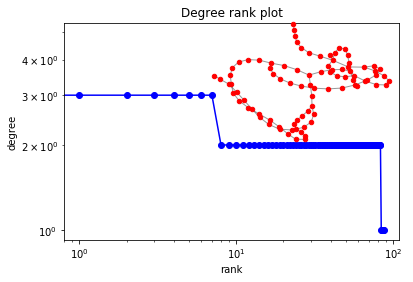

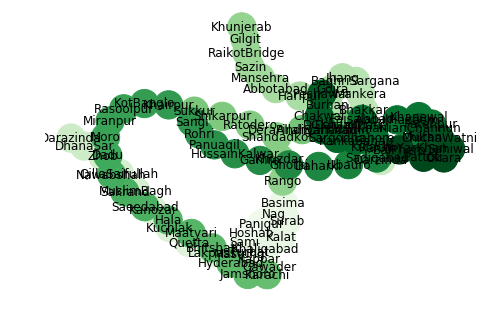

In [20]:
# importing libraries
import networkx as nx
import matplotlib.pyplot as plt

# reading graph file
G=nx.read_edgelist("FutureCPEC.txt")

# evaluating degree
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
# maximum degree
dmax = max(degree_sequence)
# minimum degree
dmin=min(degree_sequence)

plt.loglog(degree_sequence, 'b-', marker='o')
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")
# draw graph in inset
plt.axes([0.45, 0.45, 0.45, 0.45])
# degree rank plot
Gcc = sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)[0]
pos = nx.spring_layout(Gcc)
plt.axis('off')
nx.draw_networkx_nodes(Gcc, pos, node_size=20)
nx.draw_networkx_edges(Gcc, pos, alpha=0.4)
# graph info
print(nx.info(G))
print("Maximum degree=",dmax)
print("Minimum degree=",dmin)
# average path length
G=nx.path_graph("FutureCPEC.txt")
print("Average path length=",nx.average_shortest_path_length(G))
# average clustering
print("Average Clustering=",nx.average_clustering(G))
print( "Degree sequence", degree_sequence)
plt.show()
#pointing all vertices
G=nx.read_edgelist("FutureCPEC.txt")
#pos = nx.spring_layout(G, iterations=200)
nx.draw(G, pos, node_color=range(88), node_size=800, cmap=plt.cm.Greens,with_labels=True)
plt.show()

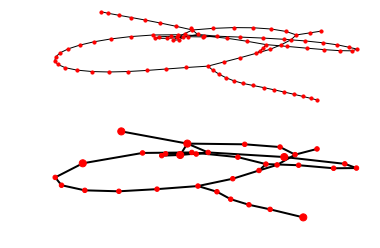

In [2]:
from collections import defaultdict

import matplotlib.pyplot as plt
import networkx as nx
import numpy
from scipy.cluster import hierarchy
from scipy.spatial import distance


def create_hc(G):
    """Creates hierarchical cluster of graph G from distance matrix"""
    path_length = nx.all_pairs_shortest_path_length(G)
    distances = numpy.zeros((len(G), len(G)))
    for u, p in path_length:
        for v, d in p.items():
            distances[u][v] = d
    # Create hierarchical cluster
    Y = distance.squareform(distances)
    Z = hierarchy.complete(Y)  # Creates HC using farthest point linkage
    # This partition selection is arbitrary, for illustrive purposes
    membership = list(hierarchy.fcluster(Z, t=1.15))
    # Create collection of lists for blockmodel
    partition = defaultdict(list)
    for n, p in zip(list(range(len(G))), membership):
        partition[p].append(n)
    return list(partition.values())


if __name__ == '__main__':
    G = nx.read_edgelist("FutureCPEC.txt")

    # Extract largest connected component into graph H
    H = next(nx.connected_component_subgraphs(G))
    # Makes life easier to have consecutively labeled integer nodes
    H = nx.convert_node_labels_to_integers(H)
    # Create parititions with hierarchical clustering
    partitions = create_hc(H)
    # Build blockmodel graph
    BM = nx.quotient_graph(H, partitions, relabel=True)

    # Draw original graph
    pos = nx.spring_layout(H, iterations=100)
    plt.subplot(211)
    nx.draw(H, pos, with_labels=False, node_size=10)

    # Draw block model with weighted edges and nodes sized by number of internal nodes
    node_size = [BM.nodes[x]['nnodes'] * 10 for x in BM.nodes()]
    edge_width = [(2 * d['weight']) for (u, v, d) in BM.edges(data=True)]
    # Set positions to mean of positions of internal nodes from original graph
    posBM = {}
    for n in BM:
        xy = numpy.array([pos[u] for u in BM.nodes[n]['graph']])
        posBM[n] = xy.mean(axis=0)
    plt.subplot(212)
    nx.draw(BM, posBM, node_size=node_size, width=edge_width, with_labels=False)
    plt.axis('off')
    plt.show()

In [1]:
import matplotlib.pyplot as plt
from networkx import nx

n = 88  # 10 nodes
m = 175  # 20 edges
G = nx.gnm_random_graph(n, m)

# some properties
print("node degree clustering")
for v in nx.nodes(G):
    print('%s %d %f' % (v, nx.degree(G, v), nx.clustering(G, v)))

# print the adjacency list
for line in nx.generate_adjlist(G):
    print(line)

nx.draw(G)
plt.show()

node degree clustering
0 5 0.000000
1 3 0.000000
2 5 0.000000
3 5 0.200000
4 5 0.000000
5 8 0.000000
6 4 0.000000
7 3 0.000000
8 3 0.333333
9 3 0.000000
10 2 0.000000
11 4 0.000000
12 2 0.000000
13 4 0.000000
14 5 0.000000
15 3 0.333333
16 5 0.000000
17 5 0.000000
18 8 0.035714
19 4 0.000000
20 2 0.000000
21 5 0.000000
22 3 0.000000
23 3 0.000000
24 3 0.000000
25 3 0.000000
26 6 0.000000
27 3 0.000000
28 8 0.071429
29 5 0.000000
30 7 0.000000
31 3 0.000000
32 5 0.100000
33 1 0.000000
34 2 0.000000
35 3 0.000000
36 5 0.000000
37 3 0.000000
38 5 0.000000
39 2 0.000000
40 6 0.000000
41 7 0.047619
42 6 0.066667
43 3 0.000000
44 3 0.000000
45 2 0.000000
46 2 0.000000
47 2 0.000000
48 4 0.000000
49 9 0.000000
50 8 0.035714
51 1 0.000000
52 4 0.166667
53 5 0.000000
54 3 0.333333
55 5 0.100000
56 7 0.000000
57 3 0.000000
58 1 0.000000
59 7 0.000000
60 5 0.000000
61 3 0.000000
62 4 0.000000
63 3 0.000000
64 5 0.000000
65 4 0.000000
66 3 0.000000
67 5 0.000000
68 4 0.000000
69 5 0.000000
70 4 0.

C:\Users\hp\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


<Figure size 640x480 with 1 Axes>

Name: 
Type: Graph
Number of nodes: 88
Number of edges: 91
Average degree:   2.0682


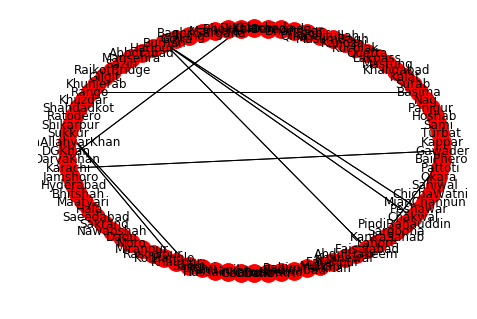

In [2]:
# Circular View

import networkx as nx
import matplotlib.pylab as plt
#g=nx.read_weighted_edgelist("edgelist.txt")
g=nx.read_edgelist("FutureCPEC.txt")
print(nx.info(g))
nx.draw_circular(g,with_labels=True)
nx.draw_circular(g)
plt.show()


Name: 
Type: Graph
Number of nodes: 88
Number of edges: 91
Average degree:   2.0682


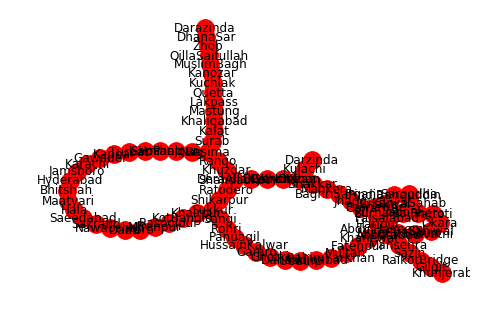

In [3]:
# Kamada Kawai View

import networkx as nx
import matplotlib.pylab as plt
#g=nx.read_weighted_edgelist("edgelist.txt")
g=nx.read_edgelist("FutureCPEC.txt")
print(nx.info(g))
nx.draw_kamada_kawai(g,with_labels=True)
nx.draw_kamada_kawai(g)
plt.show()


Name: 
Type: Graph
Number of nodes: 88
Number of edges: 91
Average degree:   2.0682


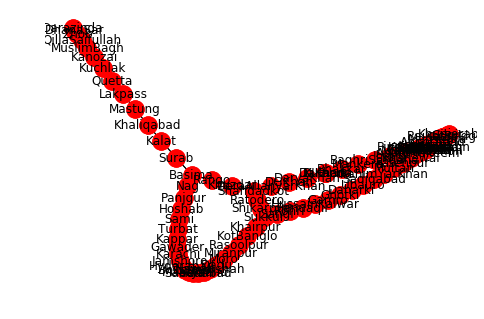

In [8]:
# Spectral View

import networkx as nx
import matplotlib.pylab as plt
#g=nx.read_weighted_edgelist("edgelist.txt")
g=nx.read_edgelist("FutureCPEC.txt")
print(nx.info(g))
nx.draw_spectral(g,with_labels=True)
nx.draw_spectral(g)
plt.show()


Name: 
Type: Graph
Number of nodes: 88
Number of edges: 91
Average degree:   2.0682


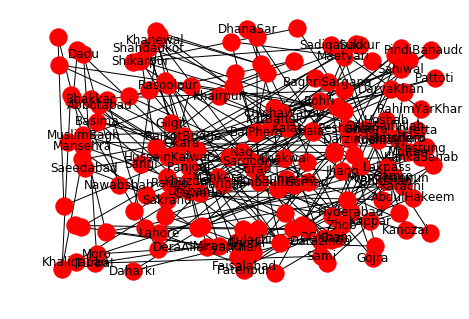

In [7]:
# Random View

import networkx as nx
import matplotlib.pylab as plt
#g=nx.read_weighted_edgelist("edgelist.txt")
g=nx.read_edgelist("FutureCPEC.txt")
print(nx.info(g))
nx.draw_random(g,with_labels=True)
nx.draw_random(g)
plt.show()


Name: 
Type: Graph
Number of nodes: 88
Number of edges: 91
Average degree:   2.0682


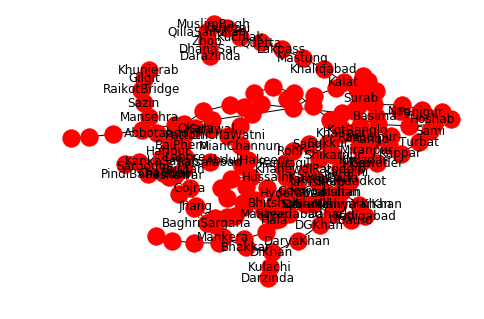

In [4]:
# Spring View

import networkx as nx
import matplotlib.pylab as plt
#g=nx.read_weighted_edgelist("edgelist.txt")
g=nx.read_edgelist("FutureCPEC.txt")
print(nx.info(g))
nx.draw_spring(g,with_labels=True)
nx.draw_spring(g)
plt.show()
